In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import string
import time
import nltk
import re

from bs4 import BeautifulSoup
from wordcloud import WordCloud
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score

In [36]:
# Importing the dataset
df_imdb=pd.read_csv("C:/Users/aksha/OneDrive/Desktop/New folder/Data Science Project Program/DataSets/Project 5_Deep Learning_NLP _Classification_Sentiment Analysis/IMDB Dataset.csv")

In [37]:
df_imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [38]:
df_imdb.shape

(50000, 2)

In [39]:
# Performing Exploratory Data Analysis(EDA) to look how our data looks like and we'll work forward accordingly

# Descriptive statistics
df_imdb.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [40]:
# lets check if there are some missing values or null values are present in the dataset 
df_imdb.isna().sum()

review       0
sentiment    0
dtype: int64

In [41]:
# value count check
df_imdb['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

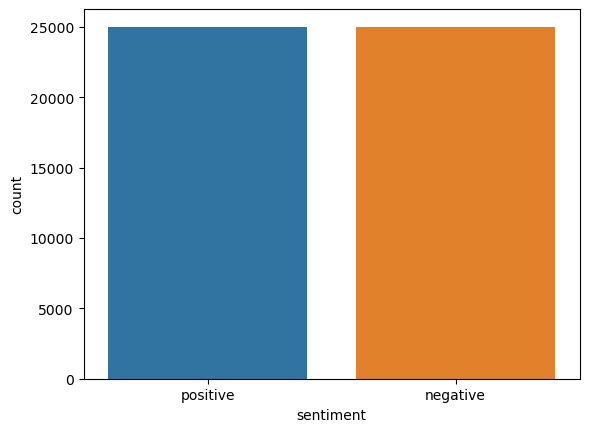

In [42]:
# plotting positive and negative count
sns.countplot(x=df_imdb['sentiment'])

#### By seeing the lables, dataset seems balanced

## Data Cleaning 

In [43]:
# let's have a look at some positive and negative reviews before we start cleaning the data
positive= df_imdb.loc[df_imdb.sentiment=='positive'].review
positive

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
4        Petter Mattei's "Love in the Time of Money" is...
5        Probably my all-time favorite movie, a story o...
                               ...                        
49983    I loved it, having been a fan of the original ...
49985    Imaginary Heroes is clearly the best film of t...
49989    I got this one a few weeks ago and love it! It...
49992    John Garfield plays a Marine who is blinded by...
49995    I thought this movie did a down right good job...
Name: review, Length: 25000, dtype: object

In [44]:
positive[4]

'Petter Mattei\'s "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler\'s play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case wit

In [45]:
negative= df_imdb.loc[df_imdb.sentiment=='negative'].review
negative

3        Basically there's a family where a little boy ...
7        This show was an amazing, fresh & innovative i...
8        Encouraged by the positive comments about this...
10       Phil the Alien is one of those quirky films wh...
11       I saw this movie when I was about 12 when it c...
                               ...                        
49994    This is your typical junk comedy.<br /><br />T...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 25000, dtype: object

In [46]:
negative[11]

"I saw this movie when I was about 12 when it came out. I recall the scariest scene was the big bird eating men dangling helplessly from parachutes right out of the air. The horror. The horror.<br /><br />As a young kid going to these cheesy B films on Saturday afternoons, I still was tired of the formula for these monster type movies that usually included the hero, a beautiful woman who might be the daughter of a professor and a happy resolution when the monster died in the end. I didn't care much for the romantic angle as a 12 year old and the predictable plots. I love them now for the unintentional humor.<br /><br />But, about a year or so later, I saw Psycho when it came out and I loved that the star, Janet Leigh, was bumped off early in the film. I sat up and took notice at that point. Since screenwriters are making up the story, make it up to be as scary as possible and not from a well-worn formula. There are no rules."

### From above outputs its pretty much clear that we need to clean the HTML tags, stop words, special characters and brackets.

In [47]:
# Downloading the stopwords from nltk and initializing the PorterStemmer
nltk.download('stopwords')
stopwords= nltk.corpus.stopwords.words('english')
ps=nltk.PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
# we will use time library to see time taken for the data cleaning
start_time= time.time()

# This function will perform the data cleaning task
def data_cleaning(text):
    
    # Removing html strips
    soup= BeautifulSoup(text,"html.parser")
    text= soup.get_text()
    
    # Removing special characters
    text= re.sub(r'[^a-zA-z0-9\s]','', text)
    
    # Removing stop words & text stemming
    tokens= re.split('\W+', text)
    text= ' '.join([ps.stem(word) for word in tokens if word.lower() not in stopwords])
    
    # Removing square brackets & URL's
    text=re.sub('\[[^]]*\]', '', text)
    text= re.sub(r'http\S+', '',text)
                
    return text

# Calling cleaning function on the review column
df_imdb['review']=df_imdb['review'].apply(data_cleaning)

end_time= time.time()
print("Time taken to perform Data Cleaning: %s sec"%(end_time - start_time))

Time taken to perform Data Cleaning: 99.40715169906616 sec


### Adding new features

In [49]:
df_imdb.head()

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive


In [50]:
# we will be using the time library to see the time taken for adding 2 new columns to the cleaned dataset
start_time=time.time()

def count_punctuation(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)- text.count(" ")),3)*100

# Adding 2 new columns: punctuation% to check the percentage of punctuations left post data cleaning and review_len to store the length
df_imdb['punctuation%']=df_imdb['review'].apply(lambda x: count_punctuation(x))
df_imdb['review_len']=df_imdb['review'].apply(lambda x: len(x) - x.count(" "))

print(df_imdb.columns)

end_time= time.time()
print("Total time taken to add 2 new columns is: %s sec"%(end_time- start_time))

Index(['review', 'sentiment', 'punctuation%', 'review_len'], dtype='object')
Total time taken to add 2 new columns is: 1.493781566619873 sec


## Word cloud of reviews

In [51]:
# Function to create a Word Cloud based on the type of sentiment for review
def generate_word_cloud(label):
    review=" ".join(review for review in df_imdb.loc[df_imdb.sentiment== label].review)
    wordcloud= WordCloud(background_color="white", width= 1600, height=800, max_words=2000, min_font_size=5).generate(review)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

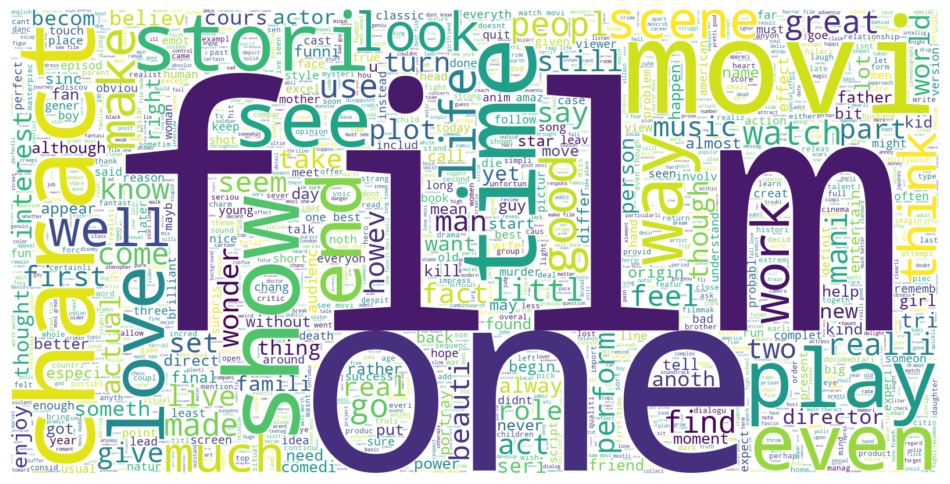

Time taken to generate  the word cloud for positive review is :21.190200567245483ec


In [52]:
start_time= time.time()
generate_word_cloud('positive')
end_time= time.time()
print('Time taken to generate  the word cloud for positive review is :% sec'%(end_time-start_time))

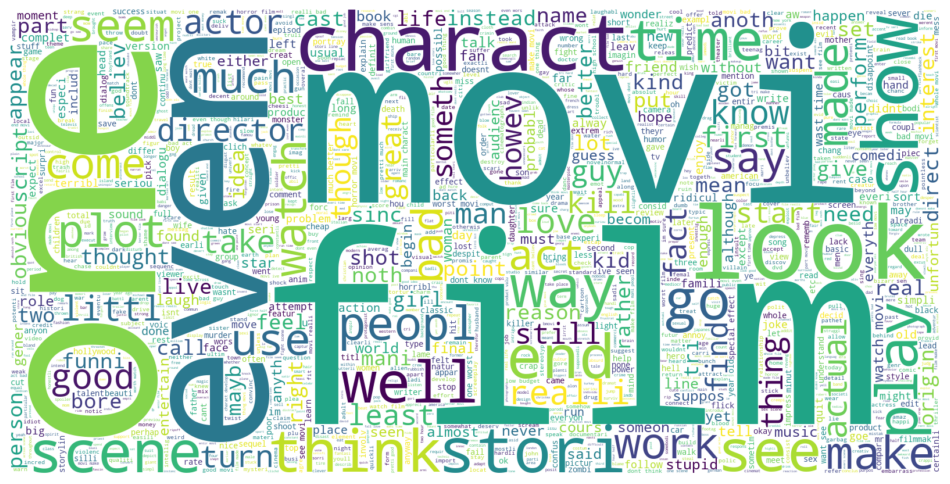

Time taken to generate  the word cloud for negative review is :20.3155996799469ec


In [53]:
start_time= time.time()
generate_word_cloud('negative')
end_time= time.time()
print('Time taken to generate  the word cloud for negative review is :% sec'%(end_time-start_time))

### Plotting Histograms for Positive and Negative reviews

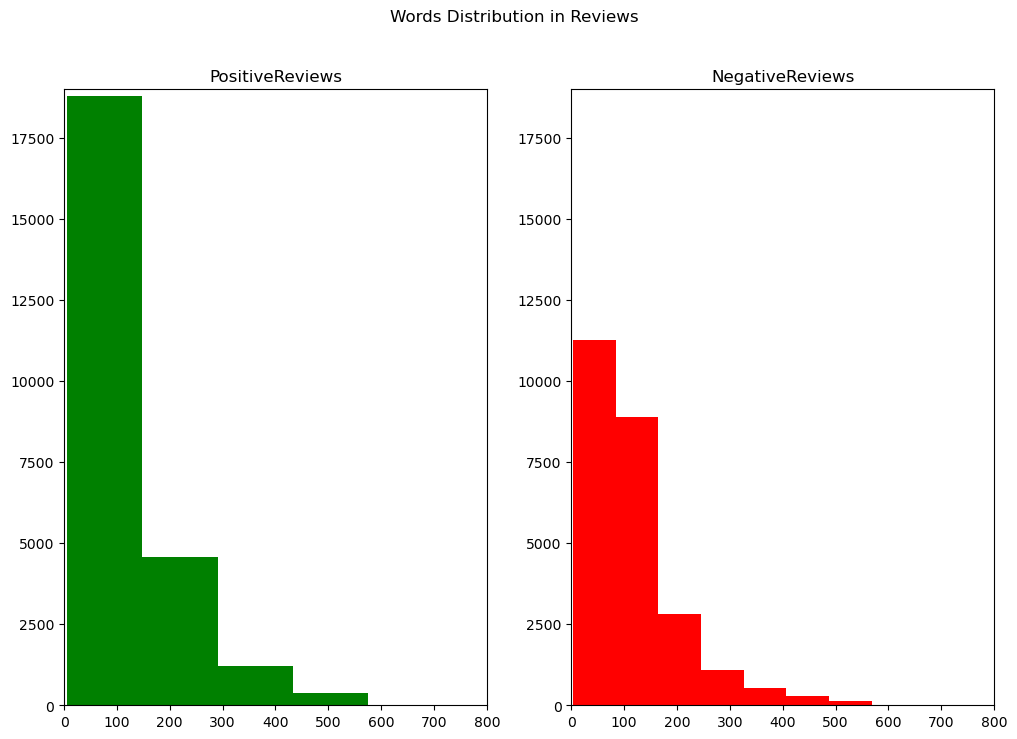

In [54]:
def generate_review_hist_plot(label, color, ax):
    text_len=df_imdb[df_imdb['sentiment']==label].review.str.split().map(lambda x: len(x))
    ax.set_xlim(0,800)
    ax.set_ylim(0,19000)
    ax.hist(text_len, color= color)
    ax.set_title(label.title() + 'Reviews')

fig, (ax1,ax2)= plt.subplots(1,2, figsize=(12,8))
generate_review_hist_plot('positive','green',ax1)
generate_review_hist_plot('negative','red',ax2)
fig.suptitle('Words Distribution in Reviews')
plt.show()

In [55]:
# Splitting the data into train ,test
X_train, X_test, y_train, y_test = train_test_split(df_imdb[['review','punctuation%','review_len']],
                                                    df_imdb['sentiment'],test_size= 0.2,
                                                    random_state= 0, stratify= df_imdb.sentiment)

In [56]:
print(X_train['review'].shape)
print(X_test['review'].shape)
print(y_train.shape)
print(y_test.shape)

(40000,)
(10000,)
(40000,)
(10000,)


## Vectorizing the text

In [57]:
start_time= time.time()

tfidf_vect= TfidfVectorizer()

X_train_vect = tfidf_vect.fit_transform(X_train['review'])
X_test_vect = tfidf_vect.transform(X_test['review'])

end_time=time.time()
print('Toal time taken to vectorize the text: %s sec'%(end_time-start_time))

Toal time taken to vectorize the text: 3.2298264503479004 sec


In [58]:
print(X_train_vect.shape)
print(X_test_vect.shape)

(40000, 155750)
(10000, 155750)


## Training and evaluating the model

In [59]:
def train_and_pred_model_eval(model_name, model):
    start_time= time.time()
    model= model.fit(X_train_vect, y_train)
    end_time= time.time()
    train_time= round((end_time-start_time),2)
    
    start_time= time.time()
    y_pred= model.predict(X_test_vect)
    end_time= time.time()
    prediction_time= round((end_time-start_time),2)
    
    accuracy= round((y_pred==y_test).sum()/len(y_pred),2)
    precision, recall, fscore = map(lambda x: round(x,2), score(y_test, y_pred, pos_label='positive', average='binary')[:3])
    
    print('{}: --> train time: {}sec / Prediction time: {} ---- Accuracy: {} / Precision: {} / Recall: {} / F1: {}'.format(model_name,train_time,prediction_time, accuracy, precision, recall, fscore))
    
    return pd.DataFrame({
        'model_name': [model_name],
        'fit_time' : [train_time],
        'pred_time' : [prediction_time],
        'accuracy' : [accuracy],
        'precision' : [precision],
        'recall' : [recall],
        'f1' : [fscore]        
    })

In [60]:
log_reg= LogisticRegression()
multi_nb = MultinomialNB()
svm= LinearSVC()

dec_tree = tree.DecisionTreeClassifier()
random_forest = RandomForestClassifier()
grad_boost= GradientBoostingClassifier()

voting_class= VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('multi_nb', multi_nb),
    ('svm', svm),
    ('dec_tree', dec_tree),
    ('random_forest', random_forest),
    ('grad_boost', grad_boost),
    ], voting= 'hard')

In [61]:
log_reg_eval= train_and_pred_model_eval('Logistic Regression', log_reg)
multi_nb_eval= train_and_pred_model_eval('Multinomial NB', multi_nb)
svm_eval= train_and_pred_model_eval('SVM', svm)

Logistic Regression: --> train time: 2.96sec / Prediction time: 0.02 ---- Accuracy: 0.89 / Precision: 0.88 / Recall: 0.91 / F1: 0.89
Multinomial NB: --> train time: 0.09sec / Prediction time: 0.0 ---- Accuracy: 0.86 / Precision: 0.86 / Recall: 0.85 / F1: 0.86
SVM: --> train time: 0.44sec / Prediction time: 0.0 ---- Accuracy: 0.89 / Precision: 0.88 / Recall: 0.9 / F1: 0.89


In [62]:
dec_tree_eval= train_and_pred_model_eval('Decision Tree', dec_tree)
random_forest_eval= train_and_pred_model_eval('Random Forest', random_forest)
grad_boost_eval= train_and_pred_model_eval('Gradient Boosting', grad_boost)

Decision Tree: --> train time: 47.8sec / Prediction time: 0.02 ---- Accuracy: 0.72 / Precision: 0.72 / Recall: 0.72 / F1: 0.72
Random Forest: --> train time: 85.41sec / Prediction time: 0.52 ---- Accuracy: 0.85 / Precision: 0.85 / Recall: 0.84 / F1: 0.85
Gradient Boosting: --> train time: 86.02sec / Prediction time: 0.02 ---- Accuracy: 0.81 / Precision: 0.78 / Recall: 0.86 / F1: 0.82


In [63]:
voting_class_eval= train_and_pred_model_eval('Voting Classifier', voting_class)

Voting Classifier: --> train time: 227.58sec / Prediction time: 0.58 ---- Accuracy: 0.89 / Precision: 0.89 / Recall: 0.87 / F1: 0.88


In [64]:
eval_df= pd.concat([log_reg_eval, multi_nb_eval, svm_eval, dec_tree_eval, random_forest_eval, grad_boost_eval], ignore_index= True)
eval_df.reset_index()
eval_df

,model_name,fit_time,pred_time,accuracy,precision,recall,f1
0,Logistic Regression,2.96,0.02,0.89,0.88,0.91,0.89
1,Multinomial NB,0.09,0.00,0.86,0.86,0.85,0.86
2,SVM,0.44,0.00,0.89,0.88,0.90,0.89
3,Decision Tree,47.80,0.02,0.72,0.72,0.72,0.72
4,Random Forest,85.41,0.52,0.85,0.85,0.84,0.85
5,Gradient Boosting,86.02,0.02,0.81,0.78,0.86,0.82


### SVM performed best in respect of training time and metrics evaluation

## Future Improvement Scope

### 1. Hyper-parameter tuning for SVM & ensemble learning models
### 2. Word embeddings & transfer learning model

     Use word embedding instead of TF-IDF
     Use existing transfer learning models(e.g BERT)